# Exploration des données

In [82]:
# IMPORTS :
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import seaborn as sns
import tarfile
import sys

# FUNCTIONS / CLASSES :
%load_ext autoreload
%autoreload 2
sys.path.append("./code")
from data_processing import read_data, merge_bases

## DICTIONNAIRE DES COUPLES DE TRADUCTIONS :
sl_tls = {
    "English-German" : "en-de",
    "English-Chinese" : "en-zh",
    "Romanian-English" : "ro-en",
    "Estonian-English" : "et-en",
    "Nepalese-English" : "ne-en",
    "Sinhala-English" : "si-en"
}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Accès aux données 

In [83]:
## PARCOURS DES COUPLES DE TRADUCTION POSSIBLES :
for key in sl_tls.keys() :
    
    val = sl_tls[key]
    
    print(key, ":")
    
    ## ACCES AUX DONNEES DE TRAIN ET DEV :
    df_train = read_data(sl_tl = val, set_type = "train")
    df_dev = read_data(sl_tl = val, set_type = "dev")
    print("DEV SIZE : " , len(df_dev))
    print("TRAIN SIZE : " , len(df_train))
    del df_dev
    del df_train
    
    ## ACCES AUX DONNEES DE TEST :
    df_test = read_data(sl_tl = val, set_type = "test")
    print("TEST SIZE : " , len(df_test))
    del df_test
    
    print("\n")
    


English-German :
DEV SIZE :  1000
TRAIN SIZE :  1000
TEST SIZE :  998


English-Chinese :
DEV SIZE :  996
TRAIN SIZE :  996
TEST SIZE :  997


Romanian-English :
DEV SIZE :  905
TRAIN SIZE :  905
TEST SIZE :  1000


Estonian-English :
DEV SIZE :  999
TRAIN SIZE :  999
TEST SIZE :  999


Nepalese-English :
DEV SIZE :  942
TRAIN SIZE :  942
TEST SIZE :  999


Sinhala-English :
DEV SIZE :  997
TRAIN SIZE :  997
TEST SIZE :  995




## Statistiques 

### Boxplot Mean Score par Type de Set

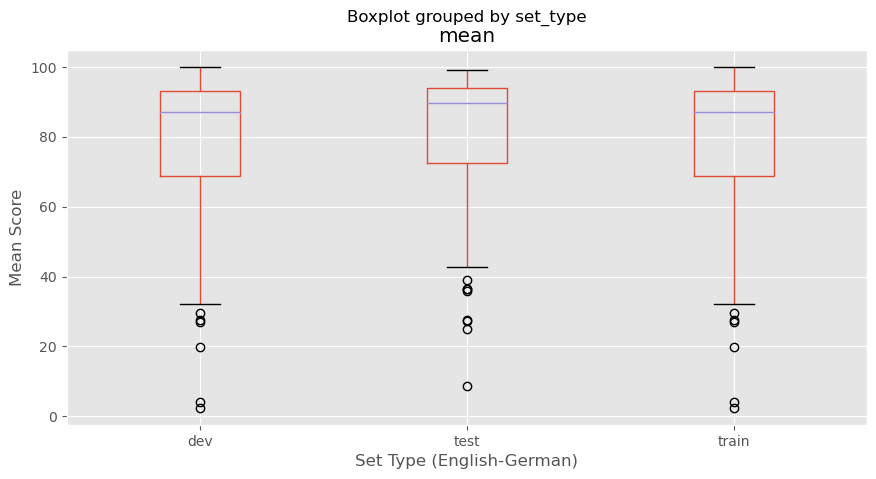

In [101]:
df = merge_bases(sl_tl = "en-de")
df.boxplot(
    column = "mean",
    by = "set_type",
    grid = True,
    figsize = (10, 5)
    )
plt.xlabel("Set Type (English-German)")
plt.ylabel("Mean Score")
plt.show()

### Distribution des scores pour chaque type de trad

In [111]:
mean_scores = {}
for key, value in sl_tls.items():
    df = merge_bases(sl_tl = value)
    mean_scores[key] = df["mean"].mean()

    

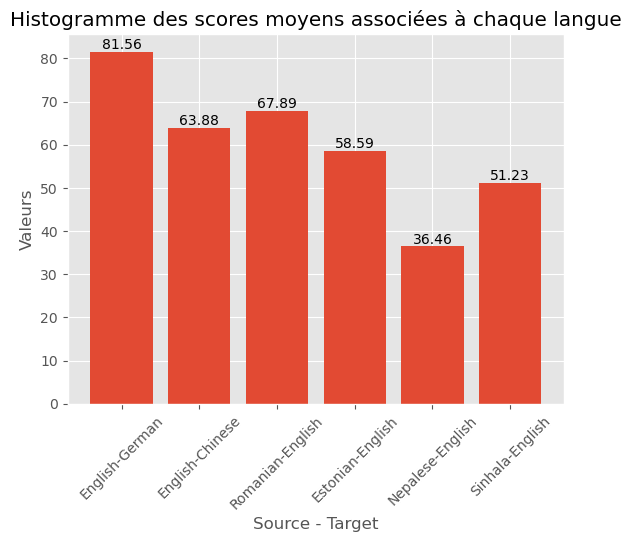

In [121]:
keys = list(mean_scores.keys())
values = list(mean_scores.values())

plt.bar(keys, values)
for i in range(len(values)):
    plt.annotate(str(round(values[i], 2)), xy=(keys[i], values[i]), ha='center', va='bottom')

plt.title('Histogramme des scores moyens associées à chaque langue')
plt.xlabel('Source - Target')
plt.ylabel('Valeurs')
plt.xticks(rotation = 45)
plt.show()